# Exploratory Data Analysis of Walmart Sales Data 

This note book explores the trends in Walmart product sales and prices.

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import ttest_ind as ttest

## 1) Read in datasets

In [2]:
sales = pd.read_pickle('sales.pkl')
prices = pd.read_pickle('prices.pkl')
calendar = pd.read_pickle('calendar.pkl')
sales = sales.merge(calendar[['month','year','d']],on='d')

## 2) General trends

### Daily total sales

We can that there is a generic upward trend. The dataset spans across 5 years and there are exactly 5 days equally spaced apart with no sales, indicating some event/holiday on which all Walmart stores are closed

Text(0.5, 1.0, 'Total sales over time')

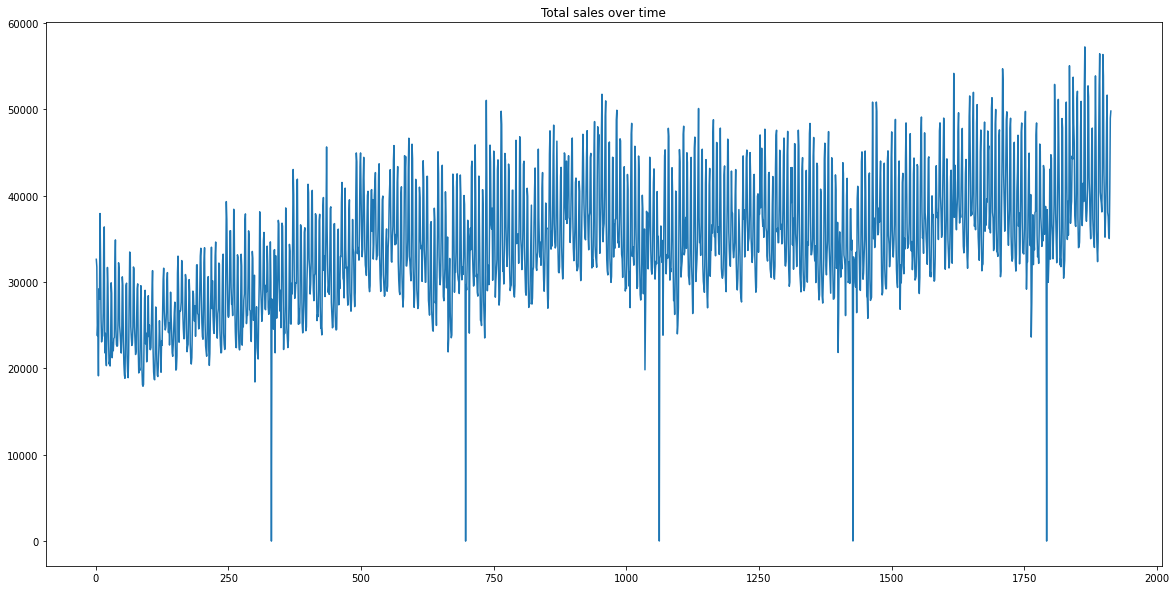

In [3]:
# total sales trend by day
d_cols = ['d_'+str(i) for i in range(1,1914)]
grand_total = sales.groupby('d')['sales'].sum()
plt.figure(figsize=(20,10))
plt.plot(grand_total.index,grand_total.values)
plt.title('Total sales over time')

### Monthly total sales

We can then look at monthly sales to have a clearer picture of the trend. This reveals a huge spike from the first month and second month. So we can look further into that later in the analysis.

Text(0.5, 1.0, 'Total sales over time')

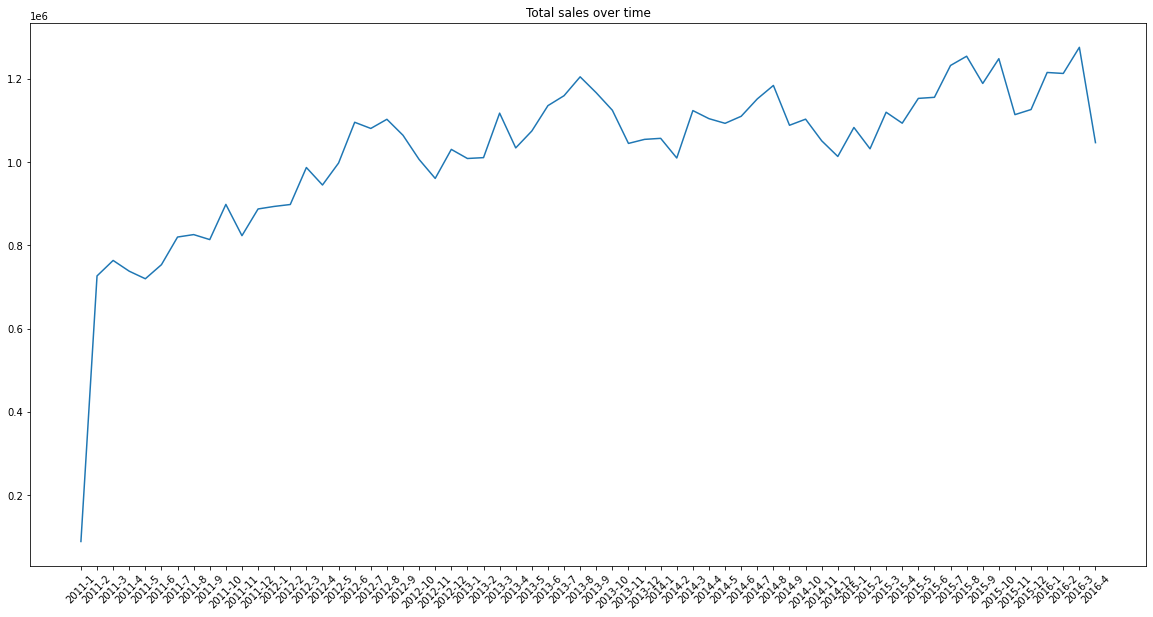

In [4]:
# total sales trend by month
total_by_month = sales.groupby(['year','month'])['sales'].sum().to_frame().reset_index()
total_by_month['x_lab'] = total_by_month[['year','month']].apply(lambda x: str(x.year) + "-" + str(x.month),axis=1)
# total_by_month
plt.figure(figsize=(20,10))
plt.xticks(rotation=45) 
plt.plot(total_by_month.x_lab.values,total_by_month.sales.values)
plt.title('Total sales over time')


## 3) Aggregated sales

### Total sales by category

From general knowledge, we know that the 3 categories -- FOODS, HOUSEHOLD and HOBBIES -- will likely have differing trends. As expected, the data shows that FOODS and HOUSEHOLD exhibit greater sales in volume as well as in growth rate.

Text(0.5, 1.0, 'Total sales by category against time')

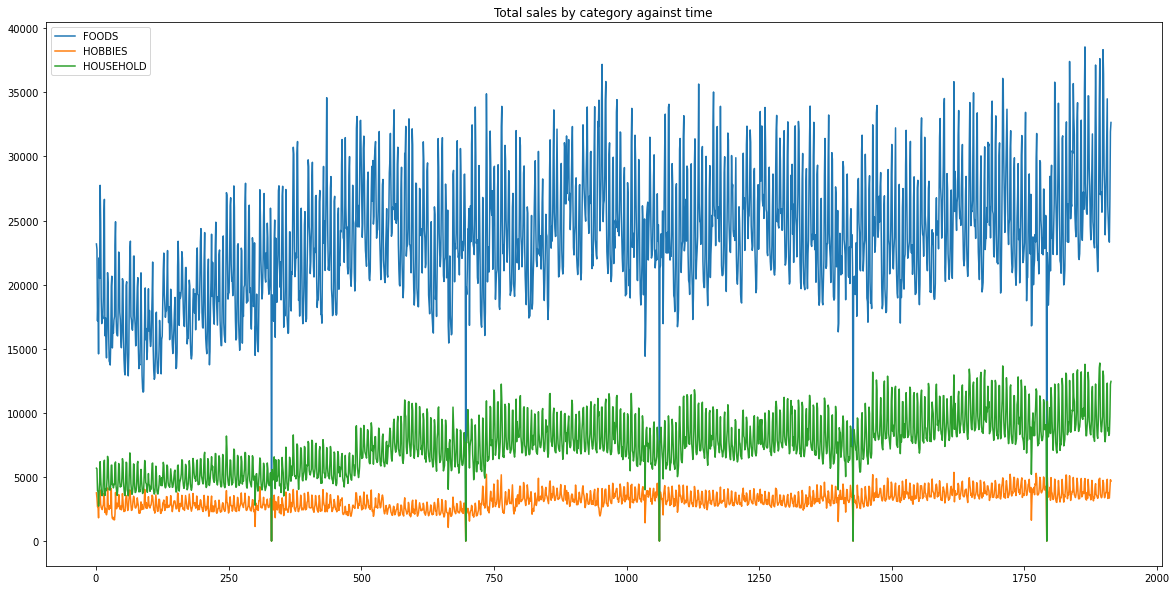

In [10]:
# total sales by category (day)
total_by_category = sales.groupby(['cat_id','d'])['sales'].sum().to_frame().reset_index()
plt.figure(figsize=(20,10))
for col in list(total_by_category.cat_id.unique()):
    df = total_by_category[total_by_category.cat_id==col]
    plt.plot(df.d, df.sales, label=col)
plt.legend()
plt.title('Total sales by category against time')

We can conclude that the total sales is mainly driven by the FOODS category

Text(0.5, 1.0, 'Total sales by category against time')

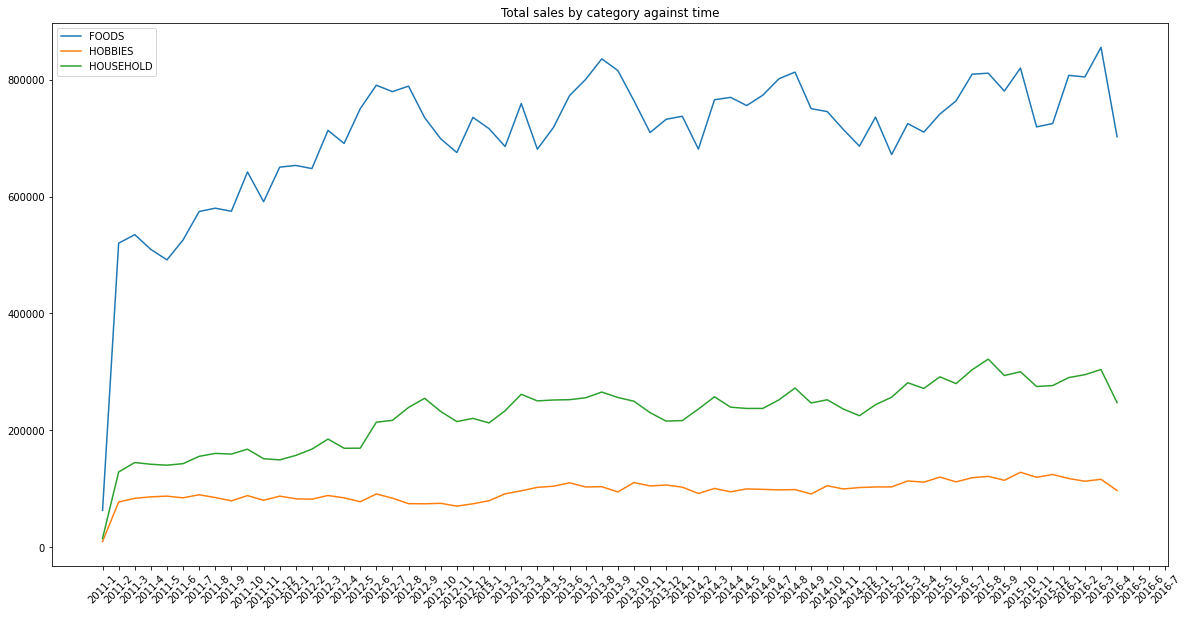

In [11]:
# total sales by category (month)
total_by_category_m = sales.groupby(['cat_id','year','month'])['sales'].sum().to_frame().reset_index()
total_by_category_m['x_lab'] = total_by_category_m[['year','month']].apply(lambda x: str(x.year) + "-" + str(x.month),axis=1)
plt.figure(figsize=(20,10))
plt.xticks(rotation=45) 
for col in list(total_by_category_m.cat_id.unique()):
    df = total_by_category_m[total_by_category_m.cat_id==col]
    plt.plot(df.x_lab, df.sales, label=col)
plt.legend()
plt.title('Total sales by category against time')

### Total sales by department

We can then take a deeper look into the total sales of each department. This reveals that FOODS_3 has the most sales compared to other departments, followed by HOUSEHOLD_1. 

Text(0.5, 1.0, 'Total sales by department against time')

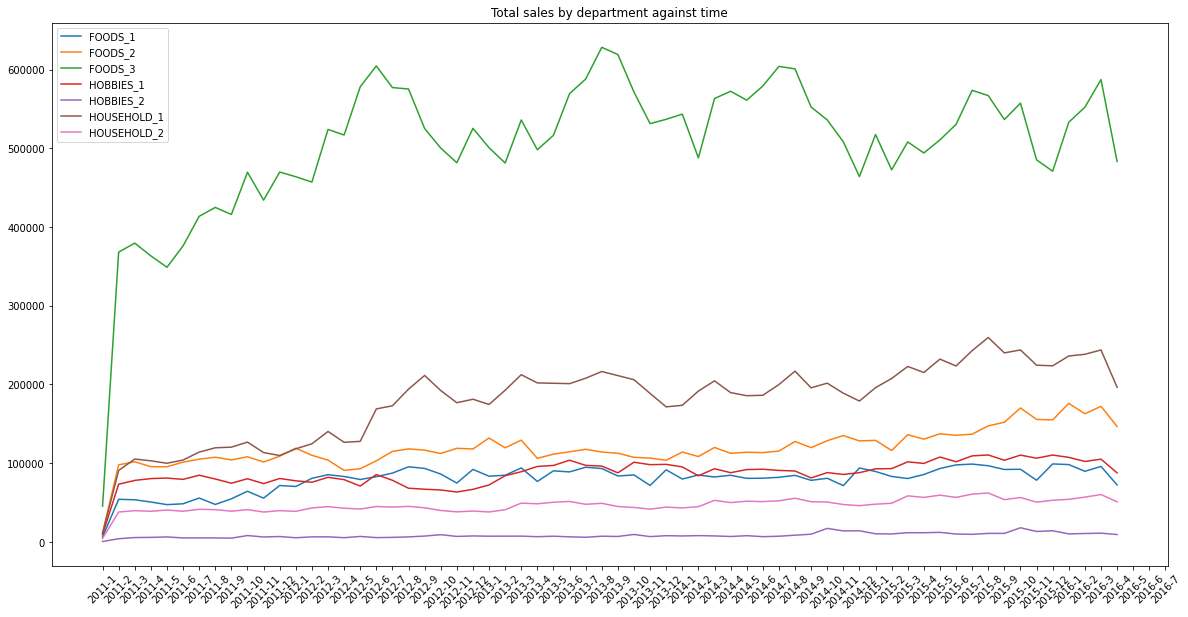

In [13]:
# total sales by department (month)
total_by_dept_m = sales.groupby(['dept_id','year','month'])['sales'].sum().to_frame().reset_index()
total_by_dept_m['x_lab'] = total_by_dept_m[['year','month']].apply(lambda x: str(x.year) + "-" + str(x.month),axis=1)
plt.figure(figsize=(20,10))
plt.xticks(rotation=45) 
for col in list(total_by_dept_m.dept_id.unique()):
    df = total_by_dept_m[total_by_dept_m.dept_id==col]
    plt.plot(df.x_lab, df.sales, label=col)
plt.legend()
plt.title('Total sales by department against time')

### Total sales by state

We can also explore how purchasing patterns differ from state to state.

Text(0.5, 1.0, 'Total sales by state against time')

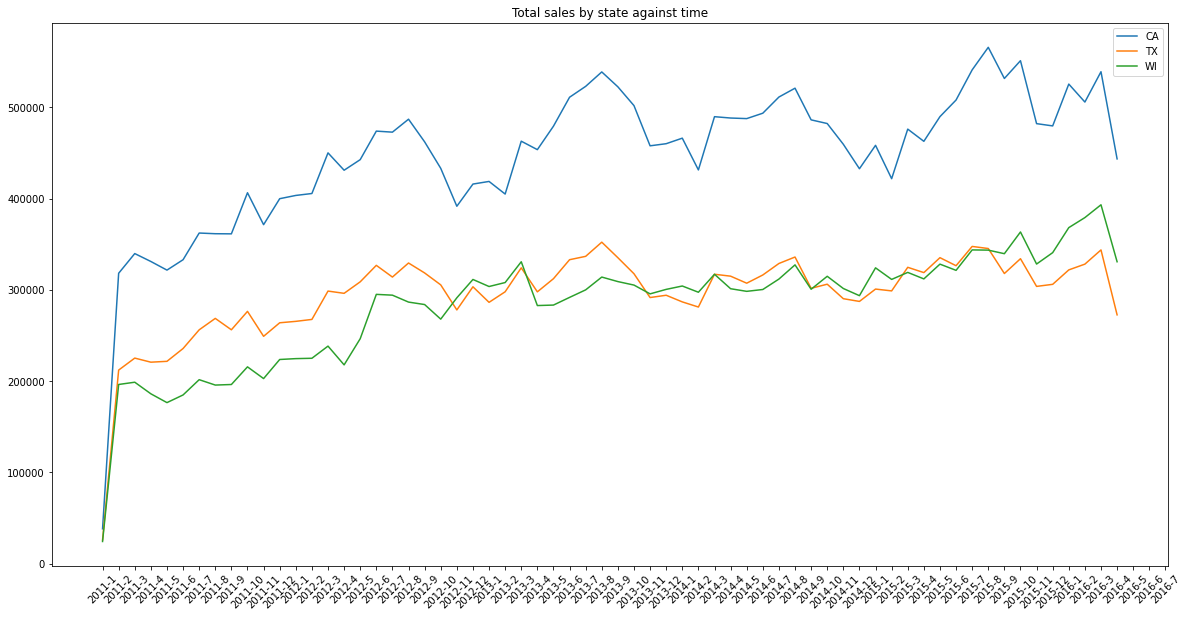

In [16]:
# total sales by state (month)
total_by_state_m = sales.groupby(['state_id','year','month'])['sales'].sum().to_frame().reset_index()
total_by_state_m['x_lab'] = total_by_state_m[['year','month']].apply(lambda x: str(x.year) + "-" + str(x.month),axis=1)
plt.figure(figsize=(20,10))
plt.xticks(rotation=45) 
for col in list(total_by_state_m.state_id.unique()):
    df = total_by_state_m[total_by_state_m.state_id==col]
    plt.plot(df.x_lab, df.sales, label=col)
plt.legend()
plt.title('Total sales by state against time')

### Total sales by store

Lastly, let's look at how the sales trend at store level.

Text(0.5, 1.0, 'Total sales by state against time')

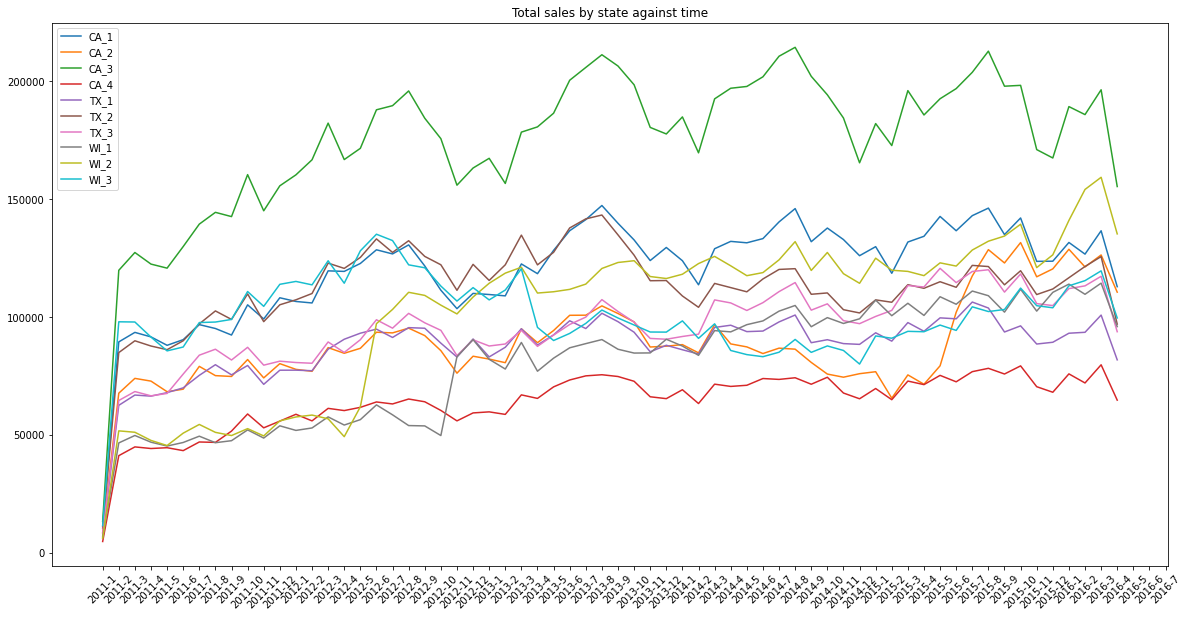

In [17]:
# total sales by store (month)
total_by_store_m = sales.groupby(['store_id','year','month'])['sales'].sum().to_frame().reset_index()
total_by_store_m['x_lab'] = total_by_store_m[['year','month']].apply(lambda x: str(x.year) + "-" + str(x.month),axis=1)
plt.figure(figsize=(20,10))
plt.xticks(rotation=45) 
for col in list(total_by_store_m.store_id.unique()):
    df = total_by_store_m[total_by_store_m.store_id==col]
    plt.plot(df.x_lab, df.sales, label=col)
plt.legend()
plt.title('Total sales by state against time')

## 4) Product release dates

Remember that we see a spike in sales from the first month and second month. The most likely reason is that many products are not sold (or sales data not collected) during the first month. So we can look at the distribution of the product release dates.

Text(0.5, 1.0, 'Number of first releases by month')

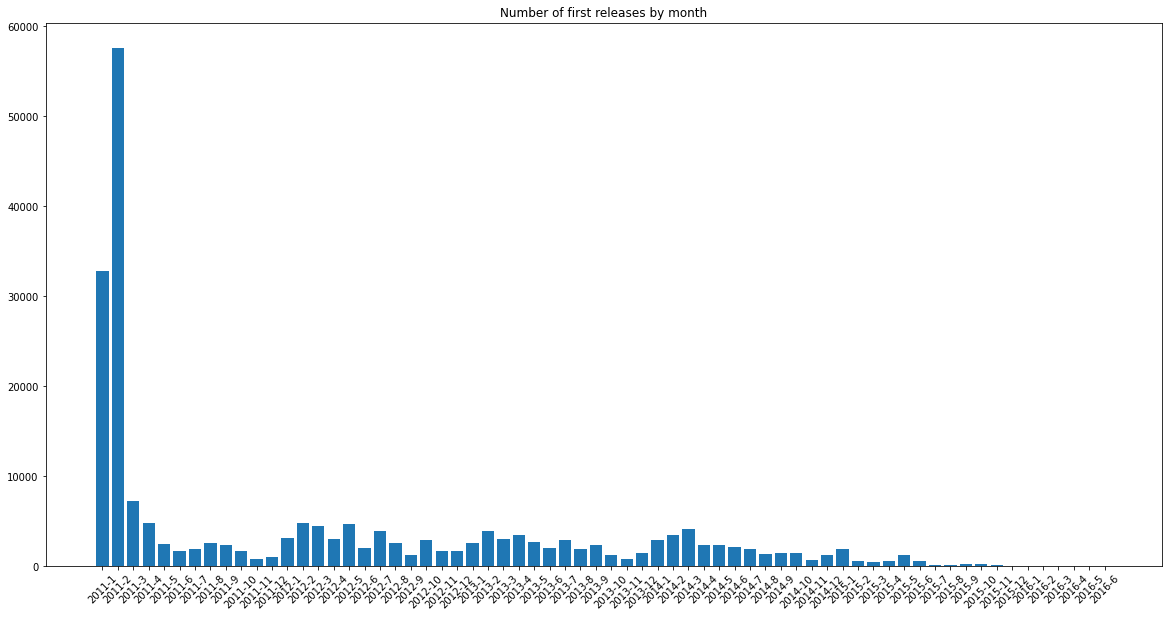

In [47]:
# find out why there is a spike at the start, look at first selling date
release = prices.groupby(['store_id','item_id'])['wm_yr_wk'].min().to_frame().reset_index()
release = release.merge(calendar[['wm_yr_wk','date','year','month']],on='wm_yr_wk')
release = calendar[['year','month']].drop_duplicates().merge(release,on=['year','month'],how='outer')
release = release.groupby(['year','month']).size().to_frame().reset_index()
release.columns = ['year','month','num_release']
release['x_lab'] = release[['year','month']].apply(lambda x: str(x.year)+"-"+str(x.month),axis=1)
plt.figure(figsize=(20,10))
plt.xticks(rotation=45) 
plt.bar(release.x_lab,release.num_release)
plt.title("Number of first releases by month")

From the chart we can see that most products are released in Feb 2011, which explains the huge spike we saw earlier on.

## 5) Prices 

### Price variation

We can first look at how prices of each product vary throughout the 5 years. We first compute the standard deviation (SD) of each product price and group them into bins. The SD is divided by the mean as a way to normalize the variation. In other words, we want to see how much the prices vary as a fraction of their average price, this way, products with a huge difference in price can be compared in the same distribution.

Text(0.5, 1.0, 'Distribution of standard deviation / mean for product prices')

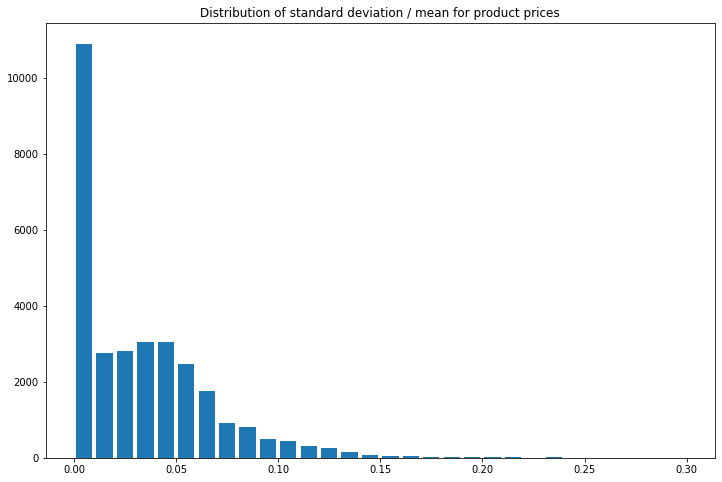

In [74]:
prices_stdev = prices.groupby(['store_id','item_id'])['sell_price'].agg(['mean','std']).reset_index()
prices_stdev['std_norm'] = prices_stdev['std'] / prices_stdev['mean']
plt.figure(figsize=(12,8))
plt.hist(prices_stdev.std_norm,30,range=(0,0.3),rwidth=0.8)
plt.title("Distribution of standard deviation / mean for product prices")

### Number of price change 

Text(0.5, 1.0, 'Distribution of number of price change for each product')

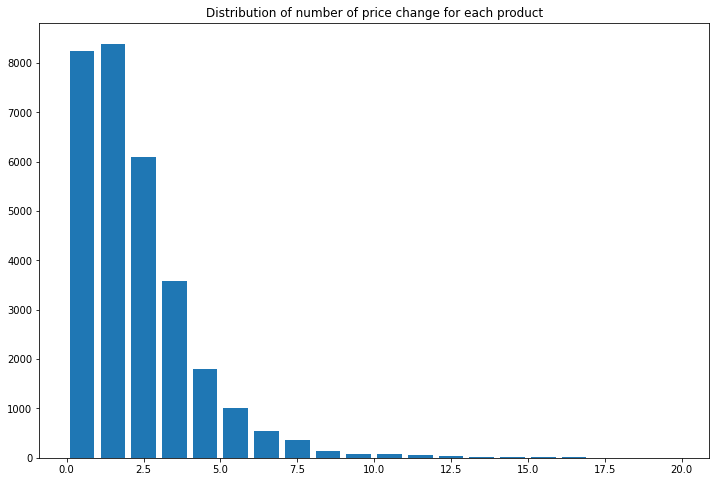

In [89]:
# number of price change for each item
prices_nunique = prices.groupby(['store_id','item_id'])['sell_price'].nunique().to_frame().reset_index()
prices_nunique.sell_price = prices_nunique.sell_price - 1
plt.figure(figsize=(12,8))
plt.hist(prices_nunique.sell_price,20,range=(0,20),rwidth=0.8)
plt.title("Distribution of number of price change for each product")

## 6) Combining calendar with sales data

### Relation between day-of-week and sales

Zooming in on data from 2015, we look at how sales correlate with day-of-week. As expected, more people go to Walmart during the weekends. More interestingly, this data seems to indicate a seasonal trend, more specifically monthly trend (12 peaks corresponding to 12 months of the year)

Text(0.5, 1.0, 'Total sales against time grouped by day of week')

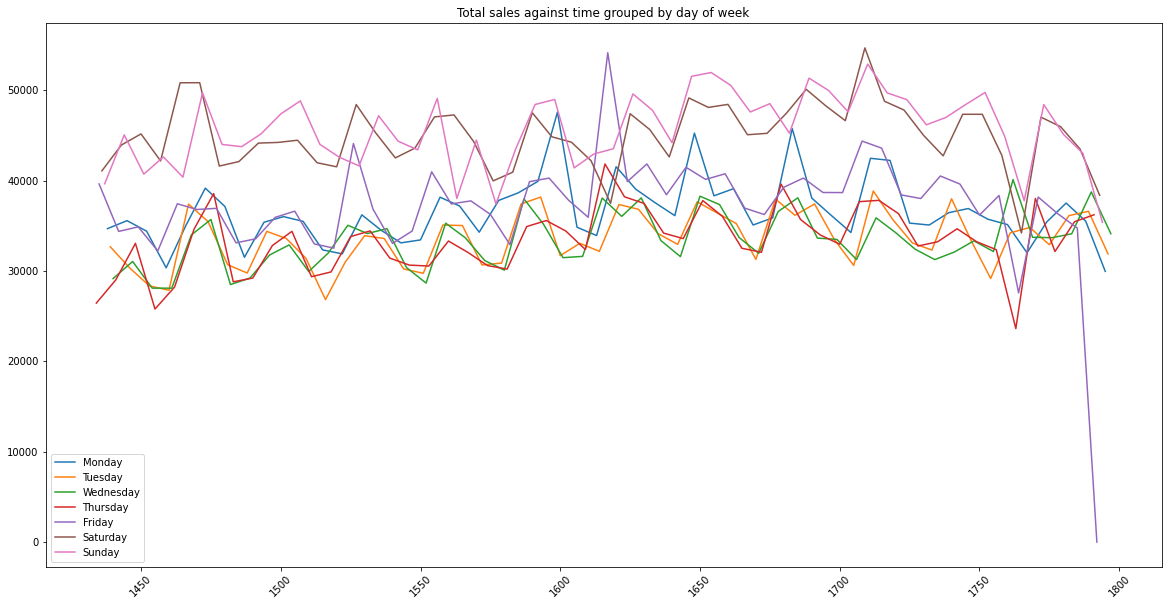

In [133]:
# look at how day-of-week correlates with total sales (2015 data)
sales2015 = sales[sales.year==2015]
sales2015 = sales2015[:-30490]
sales2015 = sales2015.merge(calendar[['d','weekday','date']],on='d')
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(20,10))
plt.xticks(rotation=45) 
for i in range(7):
    df = sales2015[sales2015.weekday==days[i]]
    df = df.groupby('d')['sales'].sum().to_frame().reset_index()
    plt.plot(df.d,df.sales,label=days[i])
plt.legend()
plt.title('Total sales against time grouped by day of week')

### Statistical t-test to see if there's a difference in sales between weekends and weekdays

The p-value does show that the sales figures between weekends and weekdays are significantly different.

In [134]:
# conduct ttest to see if there is really a difference in sales between weekends and weekdays
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday']
weekends = ['Saturday','Sunday']
weekdays_agg = sales2015[sales2015.weekday==weekdays[0]].groupby('d')['sales'].sum().values
for day in weekdays[1:]:
    weekdays_agg += sales2015[sales2015.weekday==day].groupby('d')['sales'].sum().values
weekdays_agg = weekdays_agg / 5
weekends_agg = sales2015[sales2015.weekday==weekends[0]].groupby('d')['sales'].sum().values + sales2015[sales2015.weekday==weekends[1]].groupby('d')['sales'].sum().values
weekends_agg = weekends_agg/2

print(f'Weekdays mean value: {np.mean(weekdays_agg)}')
print(f'Weekdays stdev: {np.std(weekdays_agg)}')
print(f'Weekends mean value: {np.mean(weekends_agg)}')
print(f'Weekends stdev: {np.std(weekends_agg)}')

ttest_res, pval = ttest(weekdays_agg,weekends_agg)
print(f'p-value: {pval}')

Weekdays mean value: 34793.74230769231
Weekdays stdev: 2894.028174158891
Weekends mean value: 45301.721153846156
Weekends stdev: 3491.724328010696
p-value: 1.2019222224942599e-30


### Day-of-week vs total sales by category

Breaking down further into categories, the difference in sales between weekends and weekdays is larger for FOODS. And the seasonal trend appears to be much stronger in the FOODS category.

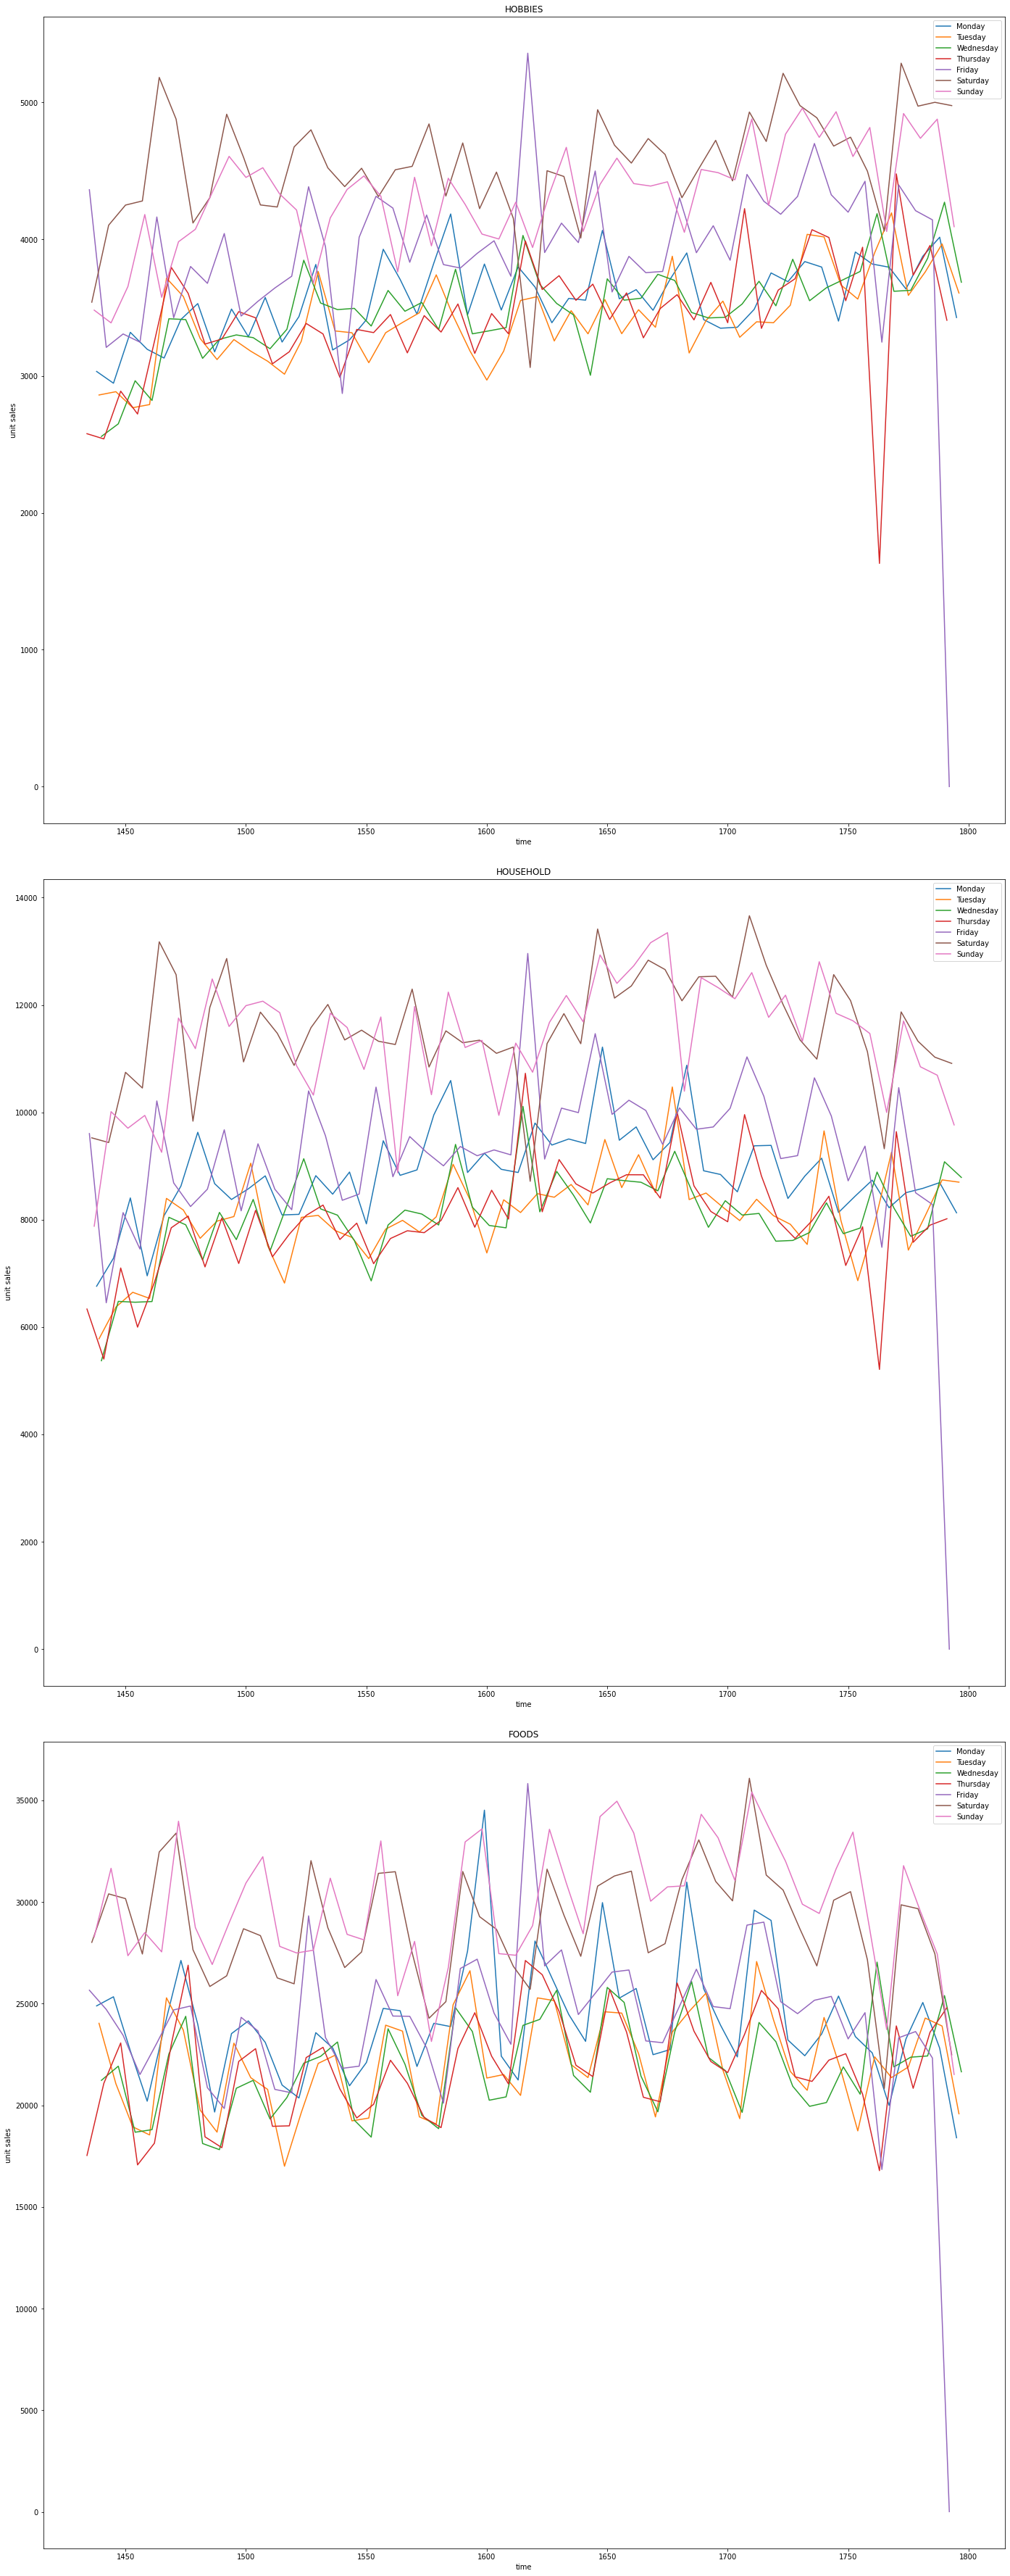

In [135]:
# look at how day-of-week correlates with total sales grouped by category (2015 data)
fig, axs = plt.subplots(3, 1,figsize=(20,50))
cats = sales2015.cat_id.unique()
for i in range(len(cats)):
    df = sales2015[sales2015.cat_id==cats[i]]
    for j in range(7):
        df2 = df[df.weekday==days[j]]
        df2 = df2.groupby('d')['sales'].sum().to_frame().reset_index()
        axs[i].plot(df2.d,df2.sales,label=days[j])
        axs[i].set_title(cats[i])
        axs[i].legend(loc='best')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='unit sales')
fig.tight_layout(pad=3.0)

### Look into correlation between part-of-month and sales

Since there appears to be a seasonal monthly trend in sales, we can look into part-of-month (start, middle or end) sales data and see if there is a difference.

Text(0.5, 1.0, 'Average sales for each part of the month over the year 2015')

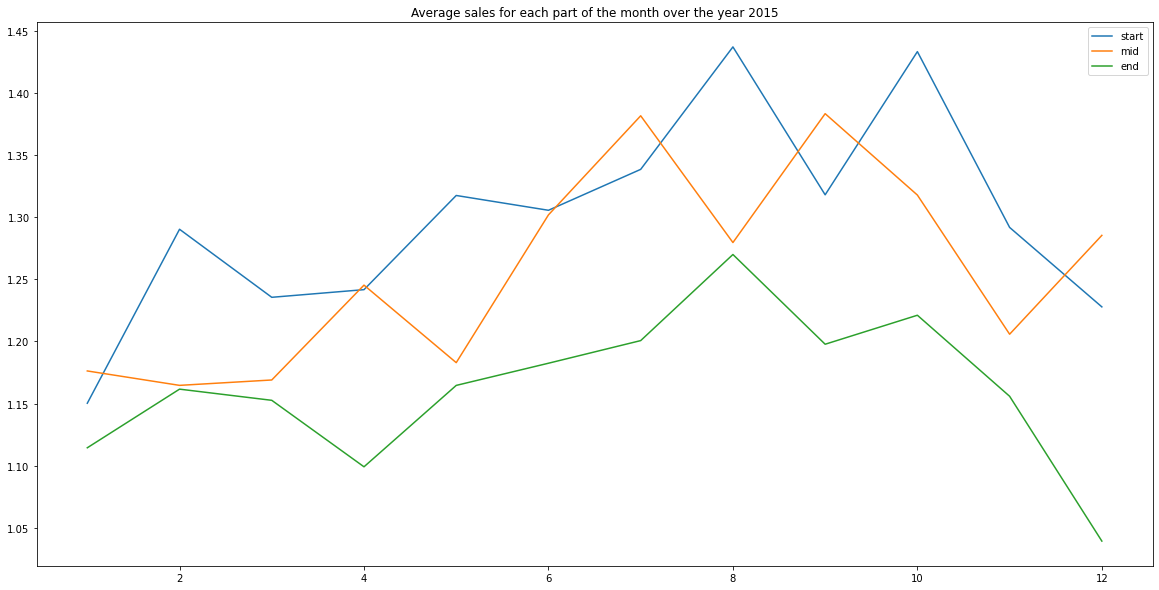

In [147]:
# look for correlation between start-of-month, middle-of-month and end-of-month with sales
def getMonthPartition(date):
    day = int(date.split('-')[-1])
    if day <= 10:
        return "start"
    elif day <= 20:
        return "mid"
    else:
        return "end"

sales2015['month_part'] = sales2015['date'].apply(getMonthPartition)
total_sales_by_monthPart = sales2015.groupby(['month','month_part'])['sales'].mean().to_frame().reset_index()
plt.figure(figsize=(20,10))
# plt.xticks(rotation=45) 
partitions = ['start','mid','end']
for part in partitions:
    df = total_sales_by_monthPart[total_sales_by_monthPart.month_part==part]
    plt.plot(df.month, df.sales, label=part)
plt.legend()
plt.title('Average sales for each part of the month over the year 2015')

### Relation between special events and sales

Lastly, we investigate if calendar events affect sales

In [157]:
events_calendar = calendar[(calendar.year==2015)&(calendar.event_name_1.notnull())][['d','date','month','event_name_1','event_type_1','event_name_2','event_type_2']]
# events_calendar.d = events_calendar.d.apply(lambda x: x-1434)
events_calendar

,d,date,month,event_name_1,event_type_1,event_name_2,event_type_2
1433,1434,2015-01-01,1,NewYear,National,NaN,NaN
1439,1440,2015-01-07,1,OrthodoxChristmas,Religious,NaN,NaN
1451,1452,2015-01-19,1,MartinLutherKingDay,National,NaN,NaN
1464,1465,2015-02-01,2,SuperBowl,Sporting,NaN,NaN
1477,1478,2015-02-14,2,ValentinesDay,Cultural,NaN,NaN
1479,1480,2015-02-16,2,PresidentsDay,National,NaN,NaN
1481,1482,2015-02-18,2,LentStart,Religious,NaN,NaN
1488,1489,2015-02-25,2,LentWeek2,Religious,NaN,NaN
1496,1497,2015-03-05,3,Purim End,Religious,NaN,NaN
1508,1509,2015-03-17,3,StPatricksDay,Cultural,NaN,NaN


In [159]:
total_sales_2015_by_dept = sales2015.groupby(['d','date','month','dept_id'])['sales'].sum().to_frame().reset_index().dropna()
total_sales_2015_by_dept

,d,date,month,dept_id,sales
0,1434,2015-01-01,1,FOODS_1,2330.0
1,1434,2015-01-01,1,FOODS_2,3068.0
2,1434,2015-01-01,1,FOODS_3,12139.0
3,1434,2015-01-01,1,HOBBIES_1,2376.0
4,1434,2015-01-01,1,HOBBIES_2,203.0
...,...,...,...,...,...
11129659,1797,2015-12-30,12,FOODS_3,14443.0
11129660,1797,2015-12-30,12,HOBBIES_1,3460.0
11129661,1797,2015-12-30,12,HOBBIES_2,226.0
11129662,1797,2015-12-30,12,HOUSEHOLD_1,7143.0


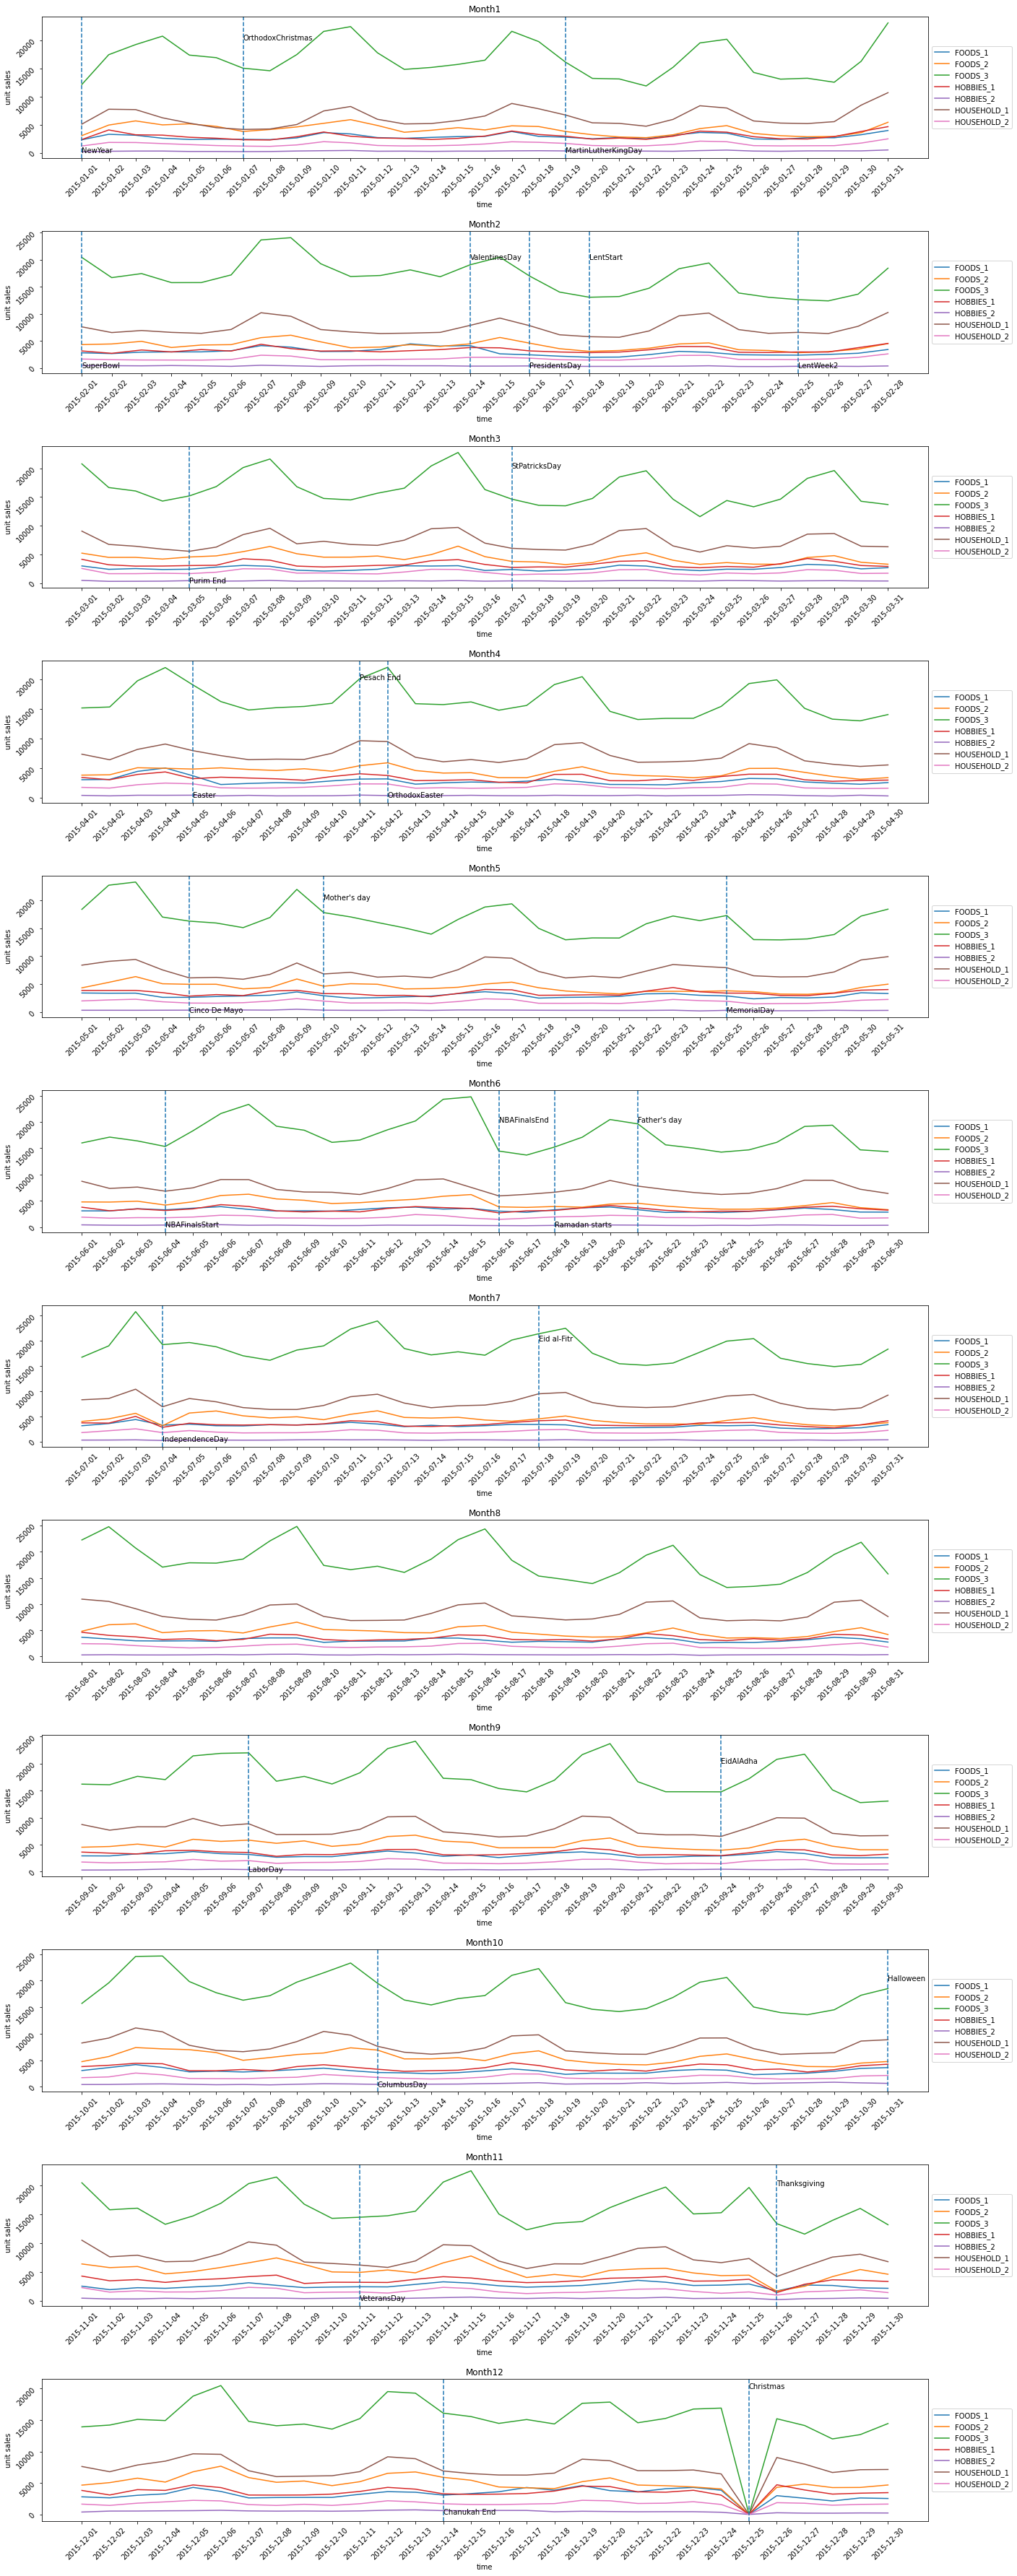

In [165]:
# look at events month by month for year 2015
fig, axs = plt.subplots(12,1,figsize=(20,50))
for i in range(1,13):
    df=total_sales_2015_by_dept[total_sales_2015_by_dept.month==i]
    events = events_calendar[events_calendar.month==i]
    annotate_x = events.date.values
    annotate_y = events.event_name_1.values
    axs[i-1].set_title("Month"+str(i))
    axs[i-1].tick_params(labelrotation=45)
    for col in list(total_sales_2015_by_dept.dept_id.unique()):
        df2 = df[df.dept_id==col]
        axs[i-1].plot(df2.date,df2.sales,label=col)
        axs[i-1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    up = True
    for j in range(annotate_x.size):
        axs[i-1].axvline(x=annotate_x[j],linestyle='dashed')
        if up:
            axs[i-1].annotate(annotate_y[j],(annotate_x[j],0))
            up = False
        else:
            axs[i-1].annotate(annotate_y[j],(annotate_x[j],20000))
            up = True
fig.tight_layout(pad=3.0)
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='unit sales')
    